In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
#Load .nc file for E3SM.MM
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
esm2_nc = xr.open_dataset(path + 'E3SM.MMF.ne30pg2_CRM64x2000.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#Standard lower resolution
#Multi Scale Modeling Framework -- aka Super Parameterized

In [4]:
#Load variables
lat = esm2_nc.lat
lon = esm2_nc.lon
time = esm2_nc.time
precc = esm2_nc.PRECC
precl = esm2_nc.PRECL
precip = precc + precl
area = esm2_nc.area
#Add PRECC and PRECL
#CC -- Convective Paramaterization processes
#CL -- Large scale processes

In [5]:
precip_slice = precip[20,:,:]*1000*60*60*24

In [13]:
#Pick out one year to plot precipitation data
precip_sel = precip.sel(time=slice("0005-01-01 00:00:00","0005-12-31 23:00:00")).mean(dim="time")*1000*60*60*24

<Figure size 640x480 with 0 Axes>

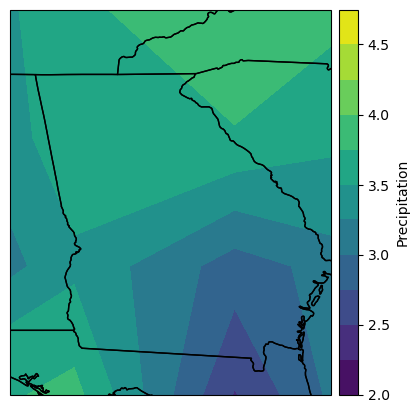

In [15]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-86, -81, 30, 36], crs=ccrs.PlateCarree())  # Set map extent

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
contour = ax.contourf(lon, lat, precip_sel, cmap='viridis', levels = np.arange(2,5,0.25), transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Precipitation')

In [7]:
#Pick out location to plot precipitation data -- Athens, GA
precip_sel_athens = precip_sel.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24

Text(0, 0.5, 'Precip (mm)')

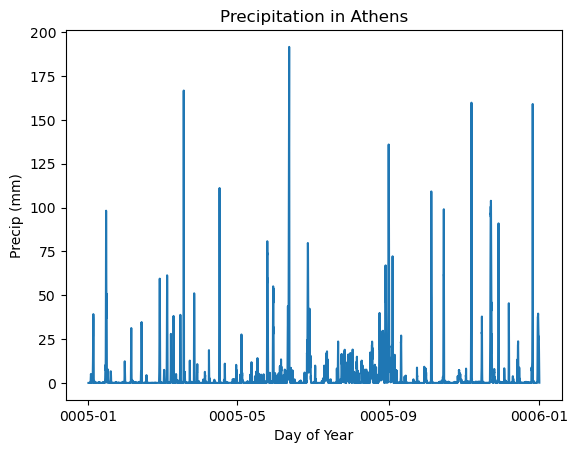

In [8]:
plt.figure()
precip_sel_athens.plot()
plt.title("Precipitation in Athens")
plt.xlabel("Day of Year")
plt.ylabel("Precip (mm)")

<Figure size 640x480 with 0 Axes>

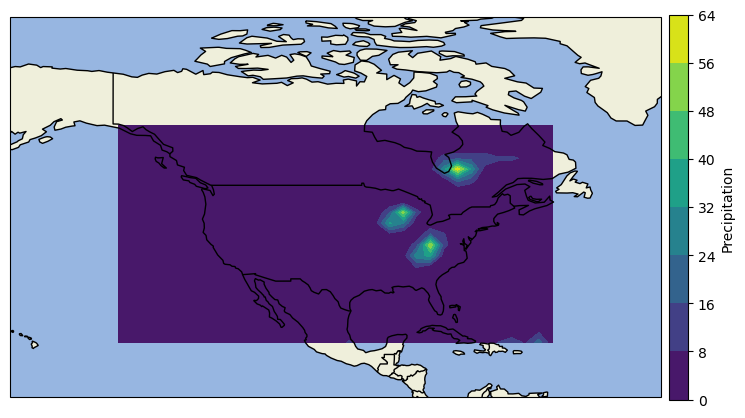

In [6]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-160, -40, 10, 80], crs=ccrs.PlateCarree())  # Set map extent

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
contour = ax.contourf(lon, lat, precip_slice, cmap='viridis', transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Precipitation')